In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv("suphan2.csv")
df.head()

,b,c,d,e,f,g,h,i,j,k,...,Farm_holding,New_Construction,tourist,sup_pop,th_worker,debt,percent_import_us,population,Planted_area,export
0,31184,7594,1365,3124,434,77,1956,3706,614,116,...,924530,592.70,713630,836,32174.85,7650,80.5,59467274,95.591759,1406310.1
1,38359,9172,2463,3534,502,84,2854,4440,874,121,...,916090,588.16,712504,843,32324.20,14120,80.6,60130186,91.687820,1411039.3
2,38593,9843,2413,3071,583,97,2256,4825,770,116,...,911272,583.62,711378,851,32780.45,20590,78.6,60846582,92.229538,1806682.0
3,41091,11598,1915,3330,712,116,1847,4712,988,102,...,904415,579.08,710252,859,32595.48,69674,80.7,61585103,93.556351,2248089.4
4,39195,10211,1561,3110,636,144,1800,4679,949,130,...,902341,574.54,290547,866,32910.83,33530,78.7,62298571,97.298302,2214248.7


In [61]:
X = df.drop('b',1)
y = df.b

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [64]:
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [65]:
scaler.mean_

array([1.66782500e+04, 1.84093750e+03, 7.47318750e+03, 8.74000000e+02,
       1.92687500e+02, 2.06468750e+03, 6.10393750e+03, 1.14612500e+03,
       2.17875000e+02, 4.00000000e+02, 2.58243750e+03, 3.54781250e+03,
       1.28750000e+01, 1.18687500e+02, 2.42575000e+03, 4.03056250e+03,
       1.64968750e+03, 1.46312500e+02, 3.13562500e+02, 5.01261000e+05,
       1.67410525e+06, 5.62355000e+02, 6.78212062e+05, 8.57062500e+02,
       3.54775306e+04, 9.38185000e+04, 7.96366500e+01, 6.49118510e+07,
       9.76887735e+01, 4.40149396e+06])

In [66]:
mean_X_train

c                    1.667825e+04
d                    1.840938e+03
e                    7.473188e+03
f                    8.740000e+02
g                    1.926875e+02
h                    2.064688e+03
i                    6.103938e+03
j                    1.146125e+03
k                    2.178750e+02
l                    4.000000e+02
m                    2.582438e+03
n                    3.547812e+03
o                    1.287500e+01
p                    1.186875e+02
q                    2.425750e+03
r                    4.030562e+03
s                    1.649688e+03
t                    1.463125e+02
u                    3.135625e+02
worker               5.012610e+05
Farm_holding         1.674105e+06
New_Construction     5.623550e+02
tourist              6.782121e+05
sup_pop              8.570625e+02
th_worker            3.547753e+04
debt                 9.381850e+04
percent_import_us    7.963665e+01
population           6.491185e+07
Planted_area         9.768877e+01
export        

In [67]:
np.sqrt(scaler.var_)

array([7.91049234e+03, 5.01662794e+02, 4.31638352e+03, 3.17189612e+02,
       9.14075481e+01, 6.81921707e+02, 2.12913793e+03, 3.94367036e+02,
       1.36234575e+02, 1.19104996e+02, 1.25004005e+03, 5.97192098e+02,
       6.40190401e+00, 6.29024232e+01, 6.49489655e+02, 2.32941693e+03,
       7.64831903e+02, 8.13408867e+01, 1.68815346e+02, 3.18845524e+04,
       6.24914079e+05, 5.03849826e+01, 3.10582157e+05, 1.13218194e+01,
       2.51558992e+03, 4.45439362e+04, 1.02960591e+00, 2.87419847e+06,
       2.64431543e+00, 2.15943824e+06])

In [68]:
std_X_train

c                    8.169921e+03
d                    5.181151e+02
e                    4.457942e+03
f                    3.275920e+02
g                    9.440531e+01
h                    7.042857e+02
i                    2.198964e+03
j                    4.073005e+02
k                    1.407025e+02
l                    1.230111e+02
m                    1.291036e+03
n                    6.167773e+02
o                    6.611858e+00
p                    6.496534e+01
q                    6.707900e+02
r                    2.405811e+03
s                    7.899150e+02
t                    8.400851e+01
u                    1.743517e+02
worker               3.293022e+04
Farm_holding         6.454085e+05
New_Construction     5.203739e+01
tourist              3.207679e+05
sup_pop              1.169312e+01
th_worker            2.598090e+03
debt                 4.600478e+04
percent_import_us    1.063372e+00
population           2.968459e+06
Planted_area         2.731037e+00
export        

In [69]:
sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

In [70]:
from sklearn.decomposition import PCA

num_components=5
pca = PCA(n_components=num_components)
pca.fit(sk_scaled_X_train)

PCA(n_components=5)

In [71]:
pca.explained_variance_

array([21.04226826,  3.97966889,  2.05166956,  1.35201796,  1.14824291])

In [72]:
pca.components_

array([[ 0.21029437,  0.15618626,  0.20850725,  0.21937819,  0.20925403,
         0.16763757,  0.21688299,  0.21004901,  0.18969427,  0.16439803,
         0.21425607,  0.06679641,  0.19097708,  0.17368761,  0.17289809,
         0.22042067,  0.22434119,  0.20711713,  0.22131494,  0.16112242,
         0.20056571, -0.0920676 , -0.01903576, -0.09162832,  0.21186974,
         0.1948848 ,  0.02917549,  0.2168168 ,  0.11102236,  0.22260053],
       [-0.03383455, -0.26438161, -0.00740559, -0.05198058, -0.07506705,
        -0.30985326, -0.1047966 , -0.10327325, -0.10605669,  0.29282362,
        -0.13316614,  0.41277027, -0.12090294,  0.15019745,  0.25800304,
        -0.05688932,  0.02317833,  0.07115259, -0.04140582,  0.12915879,
         0.08747012,  0.03731035,  0.26342555,  0.31503912, -0.00355501,
         0.21070269, -0.26042276,  0.1300753 ,  0.28087613,  0.03320577],
       [-0.09788288,  0.14103665, -0.17001671, -0.00762168,  0.10849271,
         0.01599464,  0.06669484,  0.09210459,  0

In [73]:
pca.explained_variance_ratio_

array([0.65757088, 0.12436465, 0.06411467, 0.04225056, 0.03588259])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

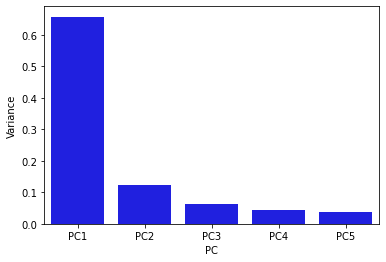

In [74]:
temp_df = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [75]:
sk_X_train_transformed  = pca.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

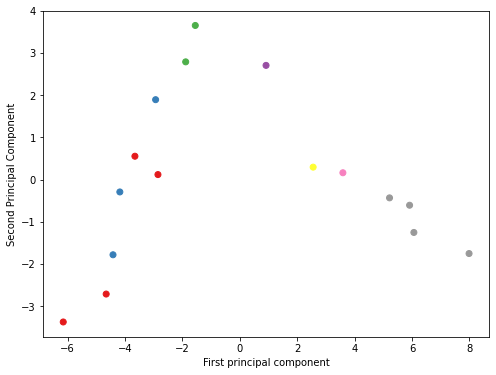

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [77]:
sk_derived_X_train = pca.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 4.18017646e-01, -3.69958781e-01, -5.79963065e-01,
         2.01179610e-01, -1.07688749e-01,  2.13994636e-01,
         1.97060863e-01, -8.72418531e-02, -1.90307719e-01,
         1.14513456e-01,  1.34132972e-02, -3.24856615e-03,
        -4.56176007e-03, -8.01031934e-01,  1.84848362e-01,
         9.97160682e-02, -2.89250970e-03,  1.98605220e-01,
         1.86012238e-01,  4.32266109e-01, -9.28602204e-02,
        -5.06973616e-01,  9.28024908e-02, -2.48037744e-02,
         3.09767360e-02, -1.38831934e-01, -1.64155027e-01,
        -4.53172597e-02, -1.30607735e-01, -9.27962409e-02],
       [ 3.63043016e-02,  4.88130308e-02, -1.87676972e-01,
         1.84032540e-02,  4.54499783e-02,  1.93215158e-01,
         4.40418709e-02,  1.10654221e-01, -1.13871551e-01,
        -5.07200986e-01,  3.01433159e-02, -7.53134333e-03,
        -4.10728358e-01,  1.08830186e-01,  1.95979783e-01,
         5.26988017e-02,  6.77638756e-02, -1.41936037e-01,
         2.03803682e-01, -9.33898433e-02, -3.85684181e-

<AxesSubplot:>

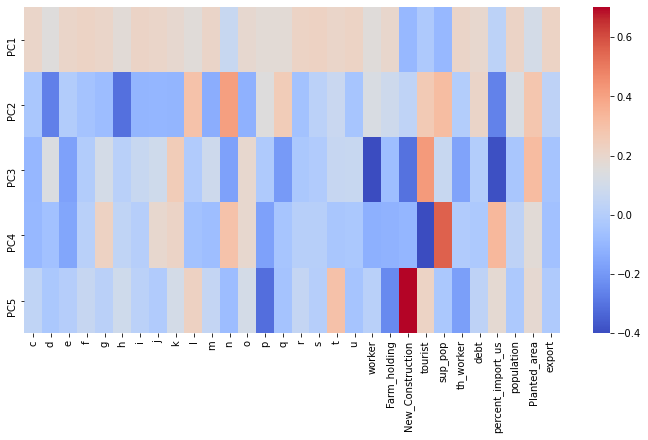

In [78]:
temp_df3 = pd.DataFrame(pca.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2: "PC3",3: "PC4",4: "PC5"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')